<a href="https://colab.research.google.com/github/jx-dohwan/DATATHON/blob/main/%EA%B3%A0%EB%8F%84%ED%99%982.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코랩에서 plt 한국어 패치
  - https://wooono.tistory.com/357

In [32]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [33]:
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [34]:
!rm ~/.cache/matplotlib -rf

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
plt.rc('font', family='NanumBarunGothic')

In [36]:
Seoul_data = pd.read_csv('/content/drive/MyDrive/인공지능/데이터톤/data/서울.csv')
Daegu_data = pd.read_csv('/content/drive/MyDrive/인공지능/데이터톤/data/대구.csv')
Busan_data = pd.read_csv('/content/drive/MyDrive/인공지능/데이터톤/data/부산.csv')
Ulsan_data = pd.read_csv('/content/drive/MyDrive/인공지능/데이터톤/data/울산.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 데이터 살펴보기

### 1) 상권업종대분류명별로 업종별로 분포가 어떻게 되는지 수치 및 시각화를 통해서 확인

In [37]:
Large_category_name = Seoul_data['상권업종대분류명'].value_counts()
Large_category_name

음식          114193
소매           99079
생활서비스        62863
학문/교육        23928
부동산          15485
관광/여가/오락      7902
스포츠           5119
숙박            2258
Name: 상권업종대분류명, dtype: int64

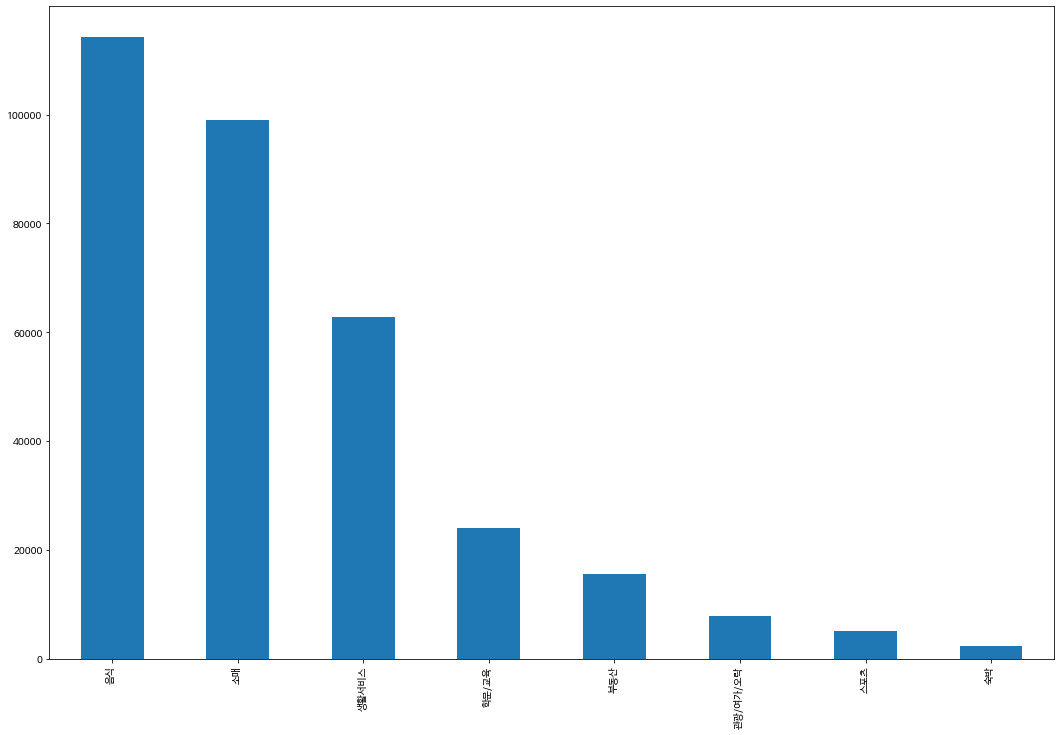

In [38]:
f,ax=plt.subplots(figsize=(18,12))
Seoul_data['상권업종대분류명'].value_counts().plot.bar()
# ax.title('Large_category_name')
# ax.ylabel('Count')
plt.show()

### 2) 음식업종의 소업종분류

In [39]:
Seoul_category = Seoul_data['상권업종대분류명'].value_counts()

Seoul_store = {}
for i in Seoul_category.keys():
    Seoul_store[i] = Seoul_data.loc[Seoul_data['상권업종대분류명']==i]
Seoul_store['음식'].head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
5,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
6,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1111012400100580000017956,두산위브파빌리온,서울특별시 종로구 삼봉로 81,110858,3150.0,NaN,NaN,NaN,126.981794,37.572387
7,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010800114850004022127,NaN,서울특별시 서초구 효령로 230,137869,6709.0,NaN,1,NaN,127.009382,37.483436
8,25530299,고향생막걸리,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,...,1168010700106150001009703,코끼리상가,서울특별시 강남구 압구정로 216,135894,6023.0,NaN,1,NaN,127.031012,37.528073


In [40]:
Daegu_category = Daegu_data['상권업종대분류명'].value_counts()

Daegu_store = {}
for i in Daegu_category.keys():
    Daegu_store[i] = Daegu_data.loc[Daegu_data['상권업종대분류명']==i]
Daegu_store['음식'].head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,20547760,옛날포장마차,NaN,Q,음식,Q09,유흥주점,Q09A02,소주방/포장마차,I56219,...,2717010200113270001025963,NaN,대구광역시 서구 달서천로41길 22,703040,41723.0,NaN,NaN,NaN,128.558109,35.884908
2,20549469,박가냉면,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2714011000110210000008286,문화아파트,대구광역시 동구 동촌로14길 14,701862,41155.0,NaN,1,NaN,128.649065,35.887930
4,17174605,장충동왕족발,NaN,Q,음식,Q01,한식,Q01A08,족발/보쌈전문,I56111,...,2723010200100200001007645,스펙트럼시티,대구광역시 북구 침산로 93,702851,41593.0,NaN,NaN,NaN,128.589799,35.885235
13,20084439,굽네치킨,지산점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2726011200112720002004141,에덴아파트,대구광역시 수성구 용학로 223,706790,42214.0,NaN,NaN,NaN,128.633540,35.821523
20,20552347,닭S포차,NaN,Q,음식,Q09,유흥주점,Q09A02,소주방/포장마차,I56219,...,2717010200105040015007748,NaN,대구광역시 서구 달서로34길 3,703040,41794.0,NaN,NaN,NaN,128.571700,35.877309


In [41]:
Busan_category = Busan_data['상권업종대분류명'].value_counts()

Busan_store = {}
for i in Busan_category.keys():
    Busan_store[i] = Busan_data.loc[Busan_data['상권업종대분류명']==i]
Busan_store['음식'].head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645
6,17173895,후라이드참잘하는집,만덕덕천점,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,2632010300108390001000805,동원맨션,부산광역시 북구 덕천로276번길 5,616827,46611.0,상가,NaN,NaN,129.035638,35.208684
9,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819,48087.0,NaN,NaN,NaN,129.159641,35.164474
10,17175370,당감제일냉면&토리커피,NaN,Q,음식,Q01,한식,Q01A19,냉면집,I56111,...,2653010500101190018025161,당감냉면,부산광역시 사상구 대동로 316,617800,46984.0,NaN,NaN,NaN,128.987253,35.155500


In [42]:
Ulsan_category = Ulsan_data['상권업종대분류명'].value_counts()

Ulsan_store = {}
for i in Ulsan_category.keys():
    Ulsan_store[i] = Ulsan_data.loc[Ulsan_data['상권업종대분류명']==i]
Ulsan_store['음식'].head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2,25269148,압구정커피,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,3171038030105090014000001,NaN,울산광역시 울주군 상북면 석남로 848,689822,44901.0,NaN,1.0,NaN,129.069455,35.614631
5,20543521,현대중공업도장식당,NaN,Q,음식,Q14,기타음식업,Q14A01,구내식당/자급식음식점,I56120,...,3117010300100000000005441,현대중공업,울산광역시 동구 방어진순환도로 1000,682792,44032.0,NaN,NaN,NaN,129.441792,35.505822
6,20545273,시오리주막식당,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,...,3114010800103840024003113,NaN,울산광역시 남구 수암로 286,680836,44765.0,NaN,1.0,NaN,129.335662,35.521510
7,20696341,커피나뜨래,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,3114010900106650002024268,현대아트맨션,울산광역시 남구 두왕로190번길 51,680820,44773.0,1,NaN,NaN,129.316518,35.517160
19,28481507,전하순두부보쌈,NaN,Q,음식,Q01,한식,Q01A15,순두부전문,I56111,...,3117010400103030055005167,NaN,울산광역시 동구 방어진순환도로 829,682060,44034.0,NaN,1.0,NaN,129.432196,35.515409


In [52]:
Seoul_Franchise = Seoul_store['음식']['상권업종소분류명'].value_counts()

Seoul_Franchise[0:20]

한식/백반/한정식      26412
커피전문점/카페/다방    18866
호프/맥주           5800
라면김밥분식          5491
후라이드/양념치킨       4143
갈비/삼겹살          3853
제과점             3707
정통양식/경양식        3558
중국음식/중국집        3301
음식점-일식          3055
국수/만두/칼국수       2164
피자전문            1559
떡볶이전문           1496
패스트푸드           1433
족발/보쌈전문         1299
아이스크림판매         1262
곱창/양구이전문        1252
소주방/포장마차        1211
룸살롱/단란주점        1129
음식점-초밥전문        1079
Name: 상권업종소분류명, dtype: int64

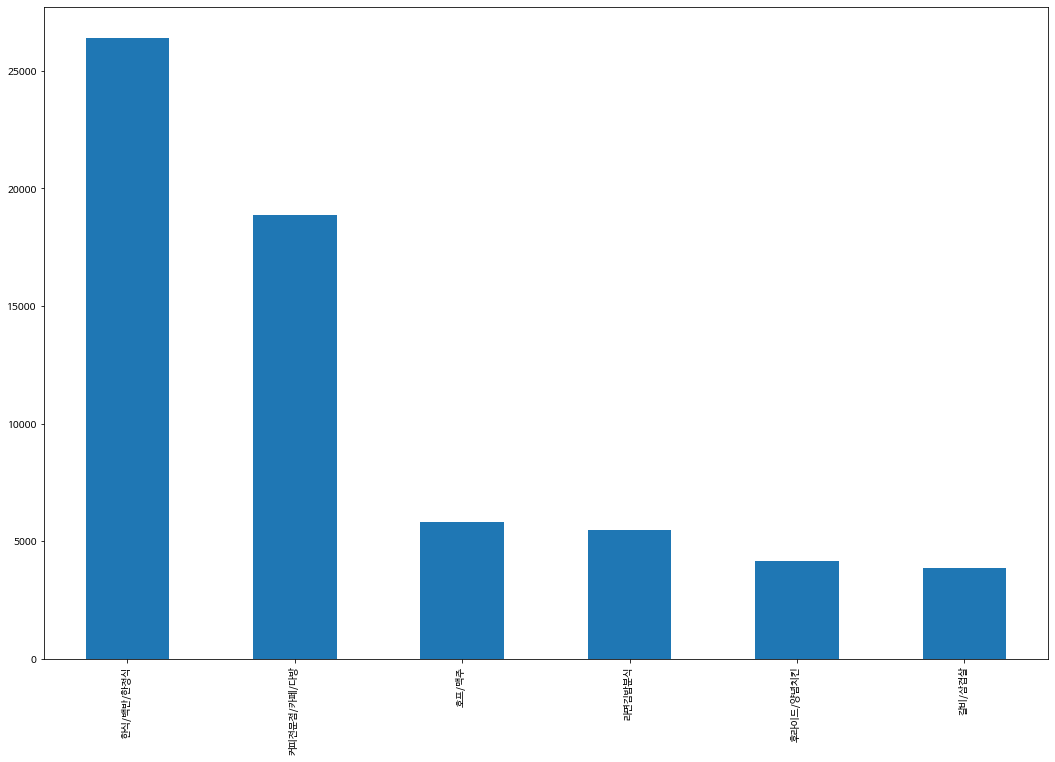

In [59]:
f,ax=plt.subplots(figsize=(18,12))
Seoul_store['음식']['상권업종소분류명'].value_counts()[0:6].plot.bar()
# ax.title('Large_category_name')
# ax.ylabel('Count')
plt.show()

In [45]:
Daegu_Franchise = Daegu_store['음식']['상권업종소분류명'].value_counts()

Daegu_Franchise[0:20]

한식/백반/한정식      8424
커피전문점/카페/다방    4750
후라이드/양념치킨      1664
갈비/삼겹살         1547
라면김밥분식         1382
호프/맥주          1228
중국음식/중국집       1088
기타고기요리          891
제과점             880
국수/만두/칼국수       788
정통양식/경양식        712
곱창/양구이전문        638
횟집              619
룸살롱/단란주점        549
음식점-일식          475
해장국/감자탕         441
족발/보쌈전문         416
떡볶이전문           415
피자전문            407
떡전문             379
Name: 상권업종소분류명, dtype: int64

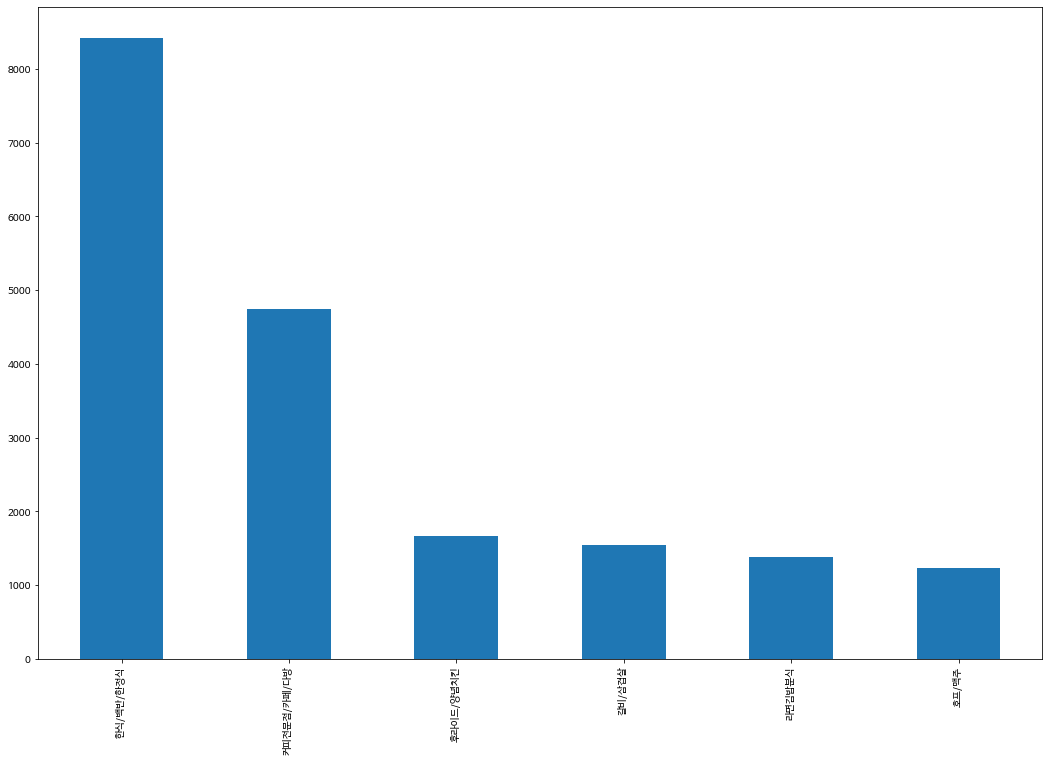

In [60]:
f,ax=plt.subplots(figsize=(18,12))
Daegu_store['음식']['상권업종소분류명'].value_counts()[0:6].plot.bar()
# ax.title('Large_category_name')
# ax.ylabel('Count')
plt.show()

In [47]:
Busan_Franchise = Busan_store['음식']['상권업종소분류명'].value_counts()

Busan_Franchise[0:20]

한식/백반/한정식      10573
커피전문점/카페/다방     6402
라면김밥분식          2401
호프/맥주           2323
후라이드/양념치킨       2260
갈비/삼겹살          1999
횟집              1768
중국음식/중국집        1721
정통양식/경양식        1341
제과점             1307
룸살롱/단란주점        1229
음식점-일식          1069
국수/만두/칼국수       1040
기타고기요리          1001
해장국/감자탕          765
족발/보쌈전문          632
소주방/포장마차         562
피자전문             557
기타일반유흥주점         475
패스트푸드            459
Name: 상권업종소분류명, dtype: int64

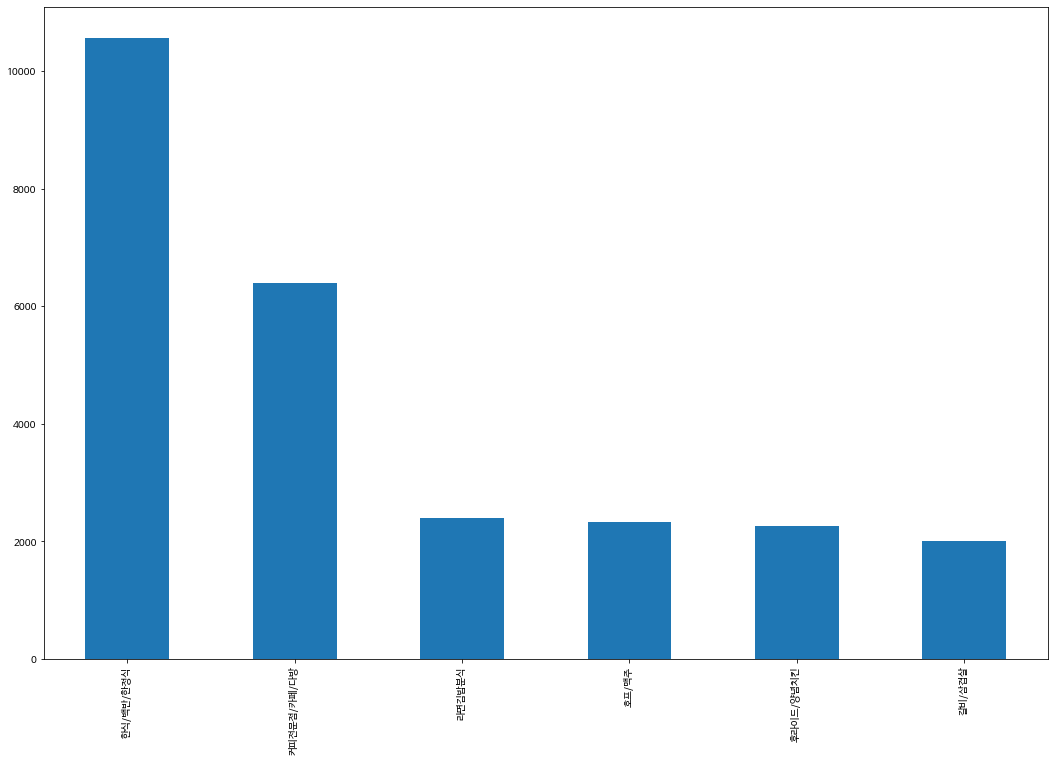

In [61]:
f,ax=plt.subplots(figsize=(18,12))
Busan_store['음식']['상권업종소분류명'].value_counts()[0:6].plot.bar()
# ax.title('Large_category_name')
# ax.ylabel('Count')
plt.show()

In [49]:
Ulsan_Franchise = Ulsan_store['음식']['상권업종소분류명'].value_counts()

Ulsan_Franchise[0:20]

한식/백반/한정식      3884
커피전문점/카페/다방    2182
갈비/삼겹살          869
호프/맥주           840
라면김밥분식          795
후라이드/양념치킨       787
룸살롱/단란주점        558
횟집              549
중국음식/중국집        507
기타고기요리          490
정통양식/경양식        411
제과점             408
국수/만두/칼국수       369
해장국/감자탕         334
음식점-일식          308
소주방/포장마차        220
족발/보쌈전문         215
피자전문            200
패스트푸드           166
기타일반유흥주점        163
Name: 상권업종소분류명, dtype: int64

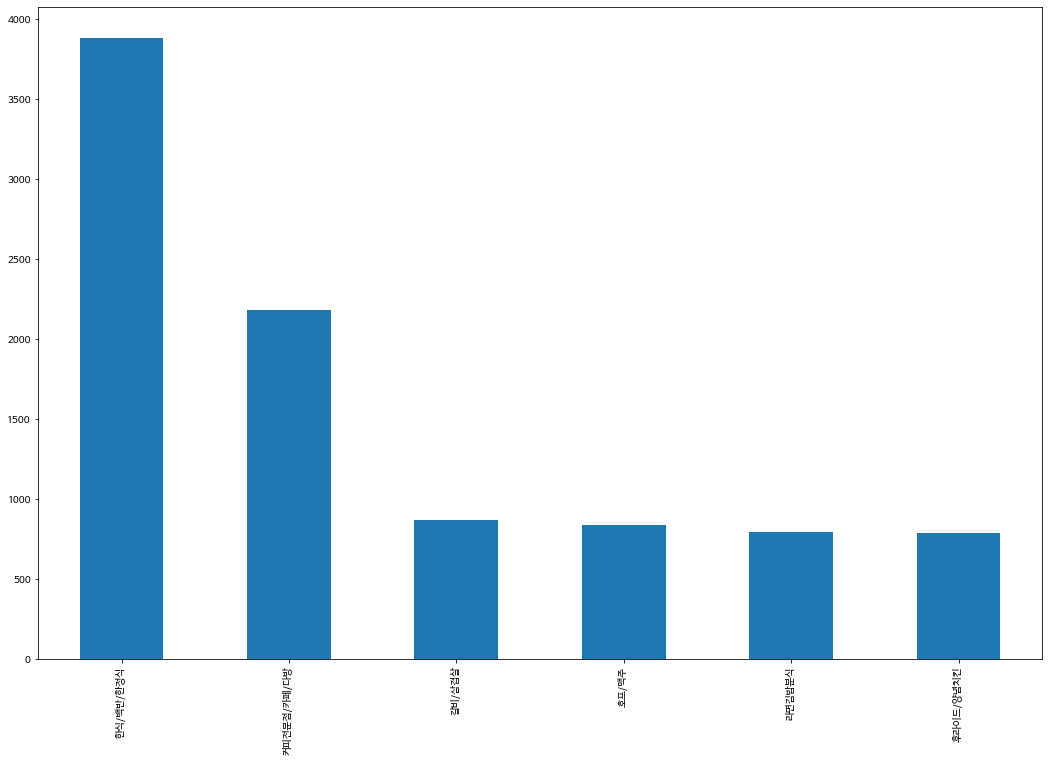

In [62]:
f,ax=plt.subplots(figsize=(18,12))
Ulsan_store['음식']['상권업종소분류명'].value_counts()[0:6].plot.bar()
# ax.title('Large_category_name')
# ax.ylabel('Count')
plt.show()

- 데이터를 확인한 결과 서울, 부산, 울산, 대구 모두 1~6순위 업종(한식,커피,고기,호프,분식,치킨)은 모두 동일한 것으로 나타났고 그 밑으로 갈수록 지역별 특성을 내포한다는 것을 확인할 수 있다.
  - 1~5순위 업종으로 분석 해는 것이 좋을 듯 하다.
  - 나머지 순위권에 대한 분석을 통해 지역의 특색 파악할 수 있지만 매출 데이터가 서울밖에 없기 때문에 이것은 잠시 뒤로 미뤄두고 먼저 **서울 지역 업종별/지역별 매출액 파악(위경도변환 및 지도데이터 활용)**에 대해서 우선순위를 두고 진행해야 할듯


- 6소업종별 점포대비 매출액 분석?
- 장사잘되는 위치
- 맥도날드 위치와 비교